In [133]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("classic")

In [134]:
#Read the data from text file
t2_data = np.genfromtxt("t2_data.txt")
gr_data = np.genfromtxt("gr_data.txt")

In [135]:
#Filter data on interval of interest
t2_data = t2_data[np.where((t2_data[:, 0] > 10900) & (t2_data[:, 0] < 11200))]
gr_data = gr_data[np.where((gr_data[:, 0] > 10900) & (gr_data[:, 0] < 11200))]

In [136]:
#Create a view of the Channels
t2_depth = t2_data[::2, 0]
t2_dist = t2_data[::2, 1:]

In [137]:
#Create a view of the Channels
gr_depth = gr_data[:,0]
gr_log = gr_data[:, 1]

In [138]:
#T2 distribution bins
tmin = 0.3
tmax = 3000
trange = np.log10(tmax)- np.log10(tmin)

#Bins
bins = np.arange(0, 30)
bin_step = trange/(len(bins)-1)
bins_log10time = (bins*bin_step)+np.log10(tmin)
bins_time = 10**bins_log10time

#Vertical filling cutoff in plot scale
cutoff = 0.5

#Factor scale the t2_disto to the vertical scale
vscalefactor= 15

#Normalization, from many methods, this example shows min-max
t2_norm = (t2_dist.max() - t2_dist.min())


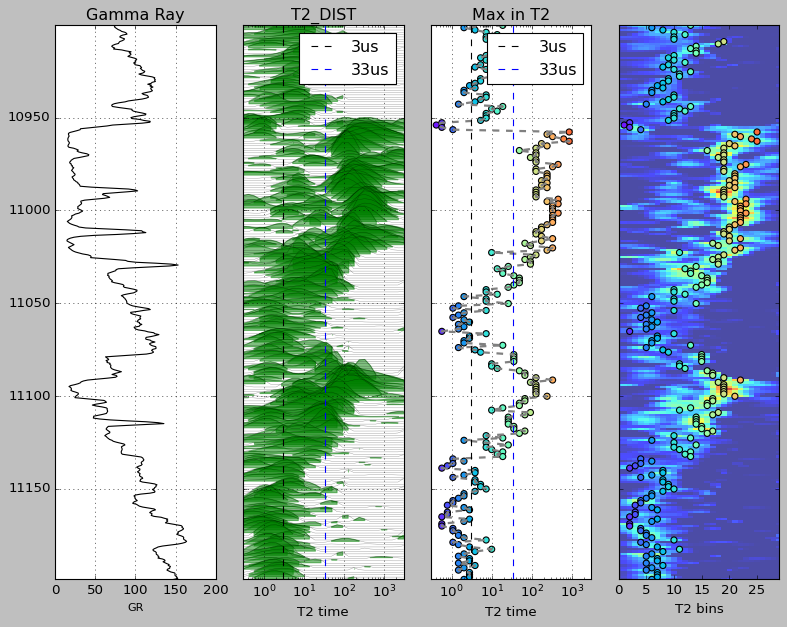

In [139]:
fig, ax = plt.subplots(1, 4 , figsize=(10, 8), sharey=True)

ax[0].set_title("Gamma Ray")
ax[0].plot(gr_log, gr_depth, "-", c="k")
ax[0].set_xlim(0, 200)
ax[0].set_xlabel("GR", fontsize="small")
ax[0].set_ylim(t2_depth.min(), t2_depth.max())
ax[0].yaxis.set_inverted(True)
ax[0].grid("on")

ax[1].set_title("T2_DIST")
for i in range(len(t2_depth)):
    ax[1].semilogx(bins_time, t2_depth[i] -vscalefactor*t2_dist[i]/t2_norm, color="k", lw=0.3, alpha=0.5)
    ax[1].fill_between(bins_time, 
                       t2_depth[i] - vscalefactor*t2_dist[i]/t2_norm, 
                       t2_depth[i]-cutoff, where=t2_depth[i] - vscalefactor*t2_dist[i]/t2_norm < t2_depth[i]-cutoff, 
                       color="green",alpha=0.5)
ax[1].set_xlabel("T2 time")
ax[1].set_xlim(bins_time.min(), bins_time.max())
ax[1].grid("on")
ax[1].axvline(3, ls="--", c="black", label ="3us")
ax[1].axvline(33, ls="--", c= "blue", label ="33us")
ax[1].legend()

ax[2].set_title("Max in T2")
ax[2].semilogx(bins_time[np.argmax(t2_dist, axis=1)], t2_depth, "--", c="gray", lw=2)
ax[2].scatter(bins_time[np.argmax(t2_dist, axis=1)], t2_depth, s=30, c=np.argmax(t2_dist, axis=1), cmap="rainbow", vmin=bins.min(), vmax=bins.max(), edgecolor="black")
ax[2].set_xlabel("T2 time")
ax[2].set_xlim(bins_time.min(), bins_time.max())
ax[2].grid("on")
ax[2].axvline(3, ls="--", c="black", label ="3us")
ax[2].axvline(33, ls="--", c= "blue", label ="33us")
ax[2].legend()

ax[3].pcolormesh(bins, t2_depth, t2_dist, alpha=0.7)
ax[3].scatter(bins[np.argmax(t2_dist, axis=1)], t2_depth, s=30, c=np.argmax(t2_dist, axis=1), cmap="rainbow", vmin=bins.min(), vmax=bins.max(), edgecolor="black")
ax[3].set_xlim(bins.min(), bins.max())
ax[3].set_xlabel("T2 bins")

fig.tight_layout()
plt.show()
